In [1]:
# Frequency and Time periods

from __future__ import division
from fractions import gcd

# signal time period in sec
t1 = 20
t2 = 30 
print "Time period of the given signals",t1,t2

f1 = 1/t1
f2 = 1/t2
print "frequency of given the signals are ",f1,f2

# greatest common divisor
gcd = gcd(1/f1, 1/f2)

# Least common multiple calculation
lcm = (1/f1 * 1/f2) * gcd
print "time period for the signal when both signals are combined is ",lcm

# frequency of the signal that is a combination of f1 and f2 is 
f = 1/lcm
print "frequency for the signal when both signals are combined is ",f

Time period of the given signals 20 30
frequency of given the signals are  0.05 0.0333333333333
time period for the signal when both signals are combined is  6000.0
frequency for the signal when both signals are combined is  0.000166666666667


In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import plotly as py
# py.tools.set_credentials_file(username='VeeraMarni', api_key='')

# def plot(y, Y):
#     fig, ax = plt.subplots(2,1)
#     ax[0].plot(t,y)
#     ax[1].plot(frq,Y)
#     ax[0].set_xlabel('Time')
#     ax[0].set_ylabel('Amplitude')
#     ax[1].set_xlabel('Freq (Hz)')
#     ax[1].set_ylabel('|Y(freq)|')
#     plot_url = py.plotly.plot_mpl(fig, filename='mpl-basic-fft')
class Plot:
    
    def __init__(self):
        fig = plt.figure()
    
    def plot1(self, x, y, title="Signal"):
        plt.title(title)
        plt.plot(x, y,)
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.show()


    def plot2(self, x, y, X, Y, title1="Signal", title2="Spectrum"):
        plt.subplot(211)
        plt.title(title1)
        plt.plot(x, y,)
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.subplot(212)
        plt.title(title2)
        plt.plot(X, Y)
        plt.xlabel('Freq (Hz)')
        plt.ylabel('|Y(freq)|')
        plt.tight_layout()
        plt.show()
    
# Making a signal

def makeSignal(f=1,sr=150):
    '''
    f: frequency of the signal
    sr: sampling rate
    '''    
    si = 1.0/(sr) # sampling interval
    t = np.arange(0,1,si)  # time vector generation
    y = np.sin(2*np.pi*f*t)
    return y,t

# Fourier Transformation

def fft(y, sr, upperHalf=False):
    '''
    y: signal
    sr: sampling rate
    '''
    n = len(y) # length of y
    k = np.arange(n)
    T = n/sr
    frq = k/T # 2 side frequency range
    Y = np.fft.fft(y)
    Y = np.abs(Y)[1:]/np.sum(np.abs(Y)[1:]) # removing freq when n=0
    if upperHalf == True:
        return Y, frq
    else:
        Y = Y[range(int(n/2))]
        frq = frq[range(int(n/2))] # 1 side frequency range
        return Y, frq
    
# Add Noise into the signal

def addNoise(y, mu=0.1, sd=0.1):
    n = len(y)
    return y + np.random.normal(loc=mu, scale=sd, size=n)

# Finding the frequency with highest power

def maxFreqPow(Y, frq):
    index = np.argmax(Y)
    return frq[index]+1 # adding 1 because we removed the freq when n = 0

def isolateNoise(y, sr, n=1, plt=False):
    Y, frq = fft(y=y,sr=sr)
    frqRecovered = list()
    for i in range(n): # n is choosen because there are n frequencies with significant power in the signal
        maxFreq = maxFreqPow(Y, frq)
        print "Removing Freq",maxFreq
        frqRecovered.append(maxFreq)
        yhat, t = makeSignal(f=maxFreq, sr=sr)
        y = y - yhat
        Y, frq = fft(y=y, sr=sr)
        if plt == True:
            draw.plot2(t, y, frq, Y)
    print frqRecovered
    return [y, frqRecovered]

draw = Plot()

frequency= 1  sampling rate= 150


/home/veera/.virtualenvs/env_i524/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


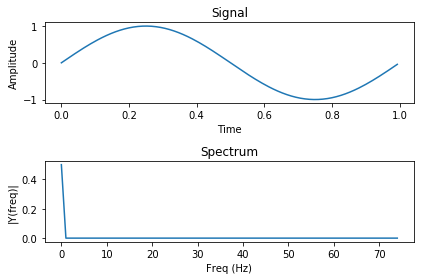

frequency= 2  sampling rate= 150


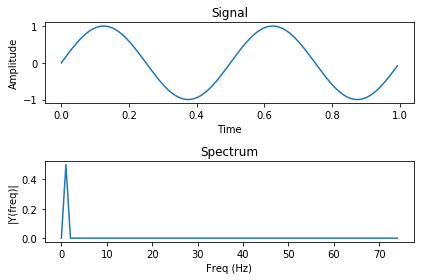

frequency= 10  sampling rate= 150


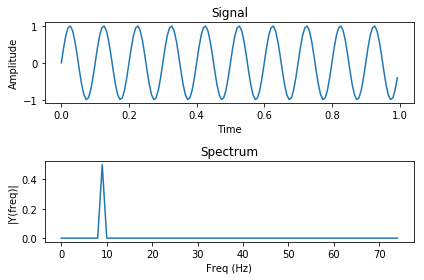

frequency= 73  sampling rate= 150


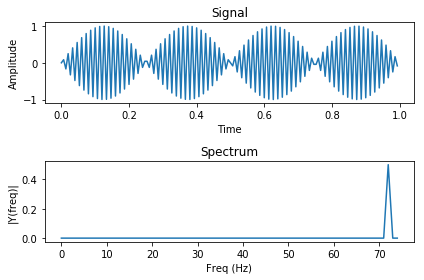

frequency= 74  sampling rate= 150


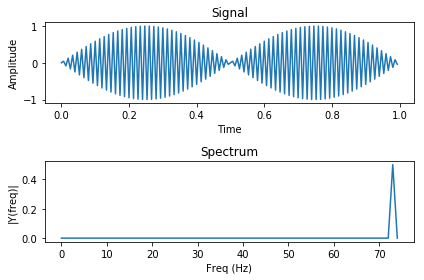

In [3]:
# Note the frequencies are symmetric around the (Nyquist frequency + 1 )
# Nyquest Freq = (150-1)/2 = 74
for f, sr in [(1,150),(2,150),(10,150),(73,150),(74,150),]:
    print "frequency=",f," sampling rate=",sr
    y,t = makeSignal(f, sr)
    Y, frq = fft(y, sr)

    draw.plot2(t, y, frq, Y)

frequency= 1  sampling rate= 150


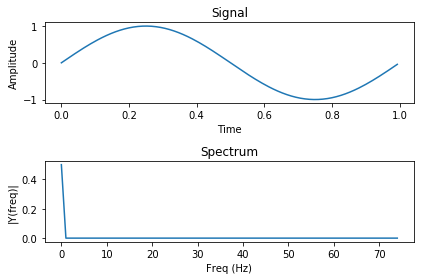

frequency= 2  sampling rate= 300


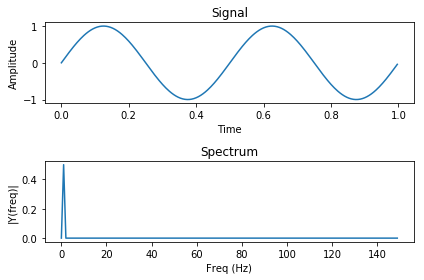

frequency= 10  sampling rate= 1500


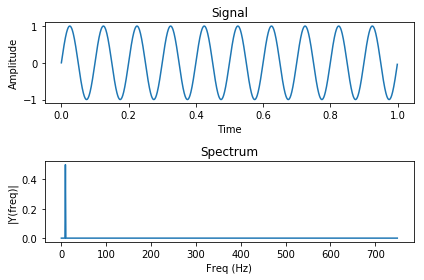

frequency= 73  sampling rate= 10950


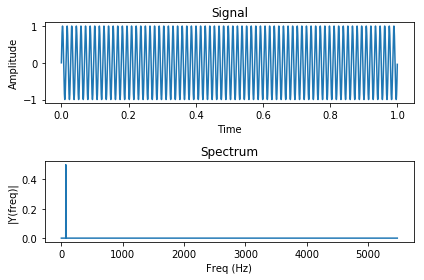

frequency= 74  sampling rate= 11100


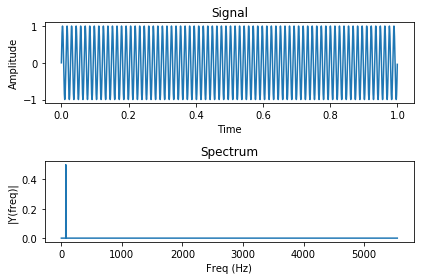

In [4]:
# Note as the sampling rate increases see how the graphs change
for f, sr in [(1,150),(2,2*150),(10,10*150),(73,73*150),(74,74*150),]:
    
    print "frequency=",f," sampling rate=",sr
    
    y,t = makeSignal(f, sr)
    
    Y, frq = fft(y, sr)

    draw.plot2(t, y, frq, Y)
    

Before adding noise


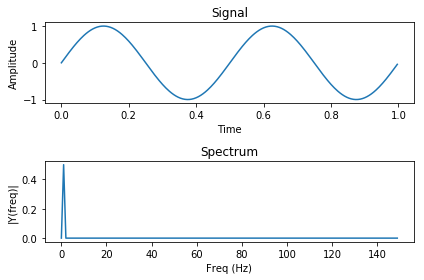

After adding Noise to the signal


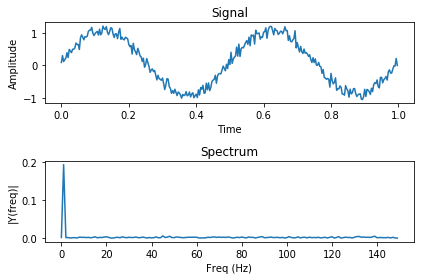

Smoothing Frequencies to remove the noise and capture the relevant frequencies
Notice the frequency that strikes out with abnormal power


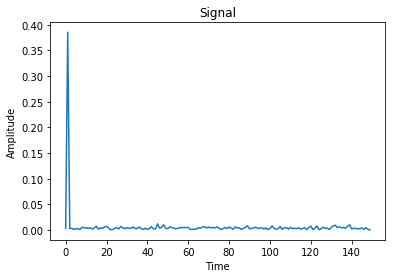

After Removing signal from the 'signal+noise'


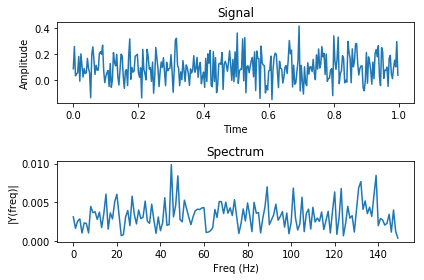

In [5]:
# Adding noise to the signal

print "Before adding noise"
# Before adding noise
f,sr = 2, 300
y,t = makeSignal(f,sr)
Y, frq = fft(y, sr)
draw.plot2(t, y, frq, Y)

print "After adding Noise to the signal"
# After adding Noise to the signal
y_ = addNoise(y)
Y_, frq_ = fft(y_, sr)
draw.plot2(t, y_, frq_, Y_)

print "Smoothing Frequencies to remove the noise and capture the relevant frequencies"
print "Notice the frequency that strikes out with abnormal power"
smoothY_ = Y_/np.sum(Y_)
draw.plot1(frq_, smoothY_)

print "After Removing signal from the 'signal+noise'"
# Removing signal from the signal+noise
maxFreqPower, maxFreq = maxFreqPow(Y_, frq_), frq[2]
yhat, t = makeSignal(maxFreq, sr)
noise = y_ - yhat
noiseFft, noiseFrq = fft(noise, sr)
draw.plot2(t,noise,noiseFrq, noiseFft, title1="noise signal", title2="noise signal frequency")

Removing Freq 60.0


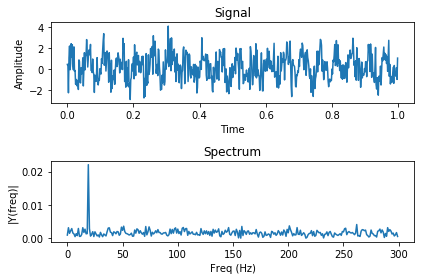

Removing Freq 20.0


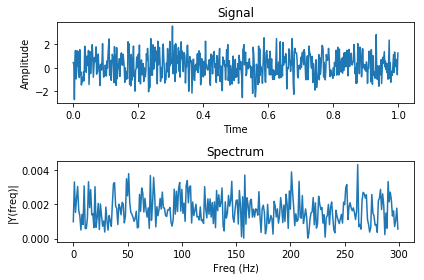

[60.0, 20.0]
Recovered Frequencies:  [60.0, 20.0]
Actual: mean and standard deviation of noise are 0.2 and 1
Estimated: mean and standard deviation of noise are 0.211053970923 and 1.00627081357


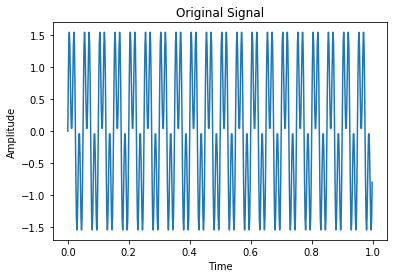

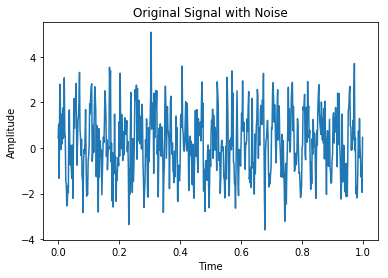

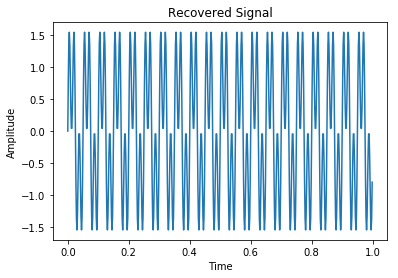

In [6]:
# signal = 2 signals with different frequencies + noise
f1 = 20; f2 = 60; sr = 600; mu = 0.2; sd = 1
y1, t1 = makeSignal(f1, sr)
y2, t2 = makeSignal(f2, sr)
yO = y1 + y2 # y origiinal
yON = addNoise(y=yO, mu=mu, sd=sd) # y original + noise

# recovering the frequencies in the signal
Y, frq = fft(y=yON, sr=sr)
noise, frqR = isolateNoise(y=yON, sr=sr, n=2, plt=True)
print "Recovered Frequencies: ",frqR
print "Actual: mean and standard deviation of noise are",mu, "and", sd
print "Estimated: mean and standard deviation of noise are",np.mean(noise), "and", np.std(noise)

# recovered signal
yR = makeSignal(frqR[0],sr)[0] + makeSignal(frqR[1],sr)[0] # y Recovered
draw.plot1(t1, yO, title="Original Signal")
draw.plot1(t1, yON, title="Original Signal with Noise")
draw.plot1(t1, yR, title="Recovered Signal")